## Step 1: Set Up the CommonsenseQA Dataset

Download and prepare the CommonsenseQA dataset
Split the data into train/validation/test sets if not already done
Understand the format (questions, multiple-choice answers)

## Step 2: Set Up Three Models

Randomly Initialized Transformer

Build a transformer architecture from scratch
Initialize weights randomly
This will serve as your baseline


Pretrained Transformer

Use the same transformer architecture as Model 1
Initialize with pretrained weights (e.g., BERT, RoBERTa)
Make sure this model wasn't specifically trained on CommonsenseQA


Large Language Model (1B+ parameters)

Choose an LLM (e.g., GPT-2, LLaMA, OPT, BLOOM)
No finetuning for this model - just prompt engineering



## Step 3: Training/Finetuning

Finetune Models 1 & 2 on CommonsenseQA train set

Use the same hyperparameters for both
Train for multiple epochs
Save checkpoints and track validation performance


For Model 3 (LLM), develop effective prompts instead of finetuning

## Step 4: Prompt Engineering (for LLM)

Design different prompt formats
Test various instruction styles
Try few-shot examples in prompts
Experiment with temperature and other generation parameters

## Step 5: Evaluation

Evaluate all three models on the test set
Calculate accuracy, F1 score, or other relevant metrics
Compare performance across models

## Step 6: Analysis

Analyze which types of questions each model handles well/poorly
Look at error patterns
Discuss why certain approaches work better

## Step 7: Create Presentation

Summarize methodology
Present results with visualizations
Include discussion of findings
Provide limitations and potential improvements

Technical Requirements:

Programming language: Python recommended
Libraries: PyTorch/TensorFlow, Transformers (Hugging Face), etc.
Computational resources: You'll need GPU access for training

.

.

**Delete steps generated by Claude later**

.

.

.

# **FS25 NLP Project 1: Word Embeddings/Recurrent Neural Networks**

Fabian Dubach

# **Introduction**

<style>
  .container {
    display: flex;
    align-items: flex-start;
    gap: 20px; /* spacing between text and ASCII art */
    font-family: monospace;
  }
  .text {
    flex: 2;
  }
  .ascii {
    white-space: pre;
    font-size: 4.5px;
    line-height: 1.2;
    flex: 1;
  }
</style>

<div class="container">
  <div class="text">
    <p>The task for my project was to perform common sense question answering using the CommonsenseQA dataset.</p><br>
    <p>I evaluated the performance of three different Transformer-based models:</p>
    <p>1. A randomly initialized Transformer</p>
    <p>2. A pretrained Transformer (with the same architecture as the first Transformer)</p>
    <p>3. A large language model (LLM) with over 1 billion parameters</p><br>
    <p>While the first two models were finetuned on the dataset using the same hyperparameters for a fair comparison, the LLM was evaluated through prompt engineering without additional training. This setup allowed me to explore how different levels of pretraining and model scale impact common sense reasoning performance.</p>
    <p>We had to also track the trainings with Wandb (workspace URL: <a href="https://wandb.ai/fabian-dubach-hochschule-luzern/CommonsenseQA/workspace?nw=nwuserfabiandubach" target="_blank">https://wandb.ai/fabian-dubach-hochschule-luzern/CommonsenseQA/workspace?nw=nwuserfabiandubach</a>).</p>
  </div>

  <div class="ascii">
<pre>
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣶⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠀⠀⠀⠀⠀⣤⣤⣤⠀⠀⠀⠀⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡇⠀⣠⡶⢿⡇⢿⣿⡏⢳⣦⠀⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⡛⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣧⣼⣿⣴⣋⡽⠮⠿⢭⣟⣏⣷⣿⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢻⣧⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡼⣇⣿⡿⠶⣶⣿⣟⡛⣷⣿⢠⠙⣧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⡈⣏⠇⢹⡀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡟⢹⠁⣿⠋⠉⢹⠉⠙⣿⡇⣾⣀⣾⠀⢀⣤⡀⢀⡀⠀⠀⢀⣠⣴⣾⠛⢻⡛⢻⡄⢀⣳⡀⢀⣠⠄⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⣷⣾⢀⣿⡇⠀⠸⠀⠀⣿⣧⡽⠿⣟⣺⣭⠴⢿⡏⣩⣷⡾⢛⣭⣴⣿⣇⠘⣿⣷⣿⡛⠉⢻⣟⣷⠄⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠿⢿⣟⣿⣿⡦⣶⣪⡭⠿⣚⣫⣭⣽⣶⡄⠀⢸⡇⣿⡙⣿⣿⣿⣿⣿⣿⣆⠹⣿⣿⣷⡀⠀⢿⡉⠁⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣀⣀⣤⣶⣿⠿⠛⣉⣭⣶⣾⣿⠿⠟⠛⠉⠉⢻⠀⢸⣷⣿⣇⢻⡿⣿⣿⣿⣿⠟⠀⠹⣿⣿⠃⠀⠘⣷⡀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣤⣦⣼⣿⠿⠛⣋⡁⣼⢠⣿⡿⠛⠉⠁⠀⠀⢀⡀⢀⣴⣾⠀⢸⣿⡇⢻⡄⠙⠿⠻⠛⠁⠀⢀⣠⣽⣿⣇⡀⠀⠸⣧⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣾⠿⣛⣭⣴⡾⠟⠛⣧⣿⢸⡿⠀⠀⠀⠀⣰⣿⣿⣷⣾⣿⣿⠀⢸⡏⣇⢸⣷⡀⠀⢀⣠⣴⣾⠿⠛⣿⢻⣿⣹⡀⠀⢻⣆⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⡟⣦⠀⠀⠀⢀⡿⣵⡿⠛⠉⣡⣶⣤⣄⣿⣯⢸⣇⠀⠀⢠⣾⣿⡿⣿⣿⣿⣿⡿⠀⢸⡇⢻⡼⣿⣷⣶⠿⠛⠉⠀⠀⠀⠸⡇⣿⣿⣧⠀⠘⣿⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⡇⢹⠀⢀⣠⣼⣿⣿⠀⢀⣼⣿⣿⣿⣿⡇⣿⢸⣿⣀⣀⣿⡿⠿⠶⠚⠛⠉⠉⠀⠀⢸⡇⠀⢻⣾⣝⣿⡆⠀⢀⣠⡴⠖⠛⢻⡾⣿⣿⣆⠀⢹⡇⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣇⣼⡾⠟⠋⣿⢻⣇⣤⣌⠻⢿⣿⣿⣿⠃⢿⠀⠉⠉⠁⠀⠀⠀⣀⣤⡤⠶⠶⠒⠚⣻⣷⣄⠈⣿⣿⣿⣿⡞⠉⠀⠀⠀⠀⠀⣿⢿⣿⣾⣋⣽⠇⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣹⠏⠀⠀⠀⣿⢿⣿⣿⣯⡴⠾⠛⢋⣡⠶⠛⠛⠋⣉⣉⣉⣙⢻⣿⠀⠀⠀⠀⠀⢠⡟⠀⠈⠻⢦⣈⣿⣿⣧⠀⠀⢀⣠⣴⡾⢿⣿⣿⣿⣿⣿⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⡟⣿⡟⠀⠀⠀⣿⠈⠋⠉⢀⣠⠴⣛⣩⣤⣶⣞⣭⣿⢿⣿⣿⣻⣼⣿⣆⣀⣤⣤⣴⣿⣄⣠⣶⣦⣀⣙⣿⣿⣿⡶⣿⠟⠋⣁⣶⠟⢻⣽⣿⣿⣿⠇⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⢠⣿⣇⠀⠀⠀⢹⣠⡴⠖⢻⣷⢫⣿⣿⣿⣯⣿⣟⣿⣿⣭⣽⣿⡿⣿⣿⣿⠿⠿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⣿⠋⠉⣿⠀⢸⣿⣿⣿⣿⣷⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣼⣿⣿⣤⣴⣾⢿⡅⠀⣀⣾⢿⣿⣿⣿⣿⣿⣿⡿⣿⣷⣿⣿⣿⡇⣿⣿⡇⠀⠀⢸⣿⣿⡟⢿⣿⣿⣿⣿⣿⣣⣿⠁⣿⣀⣤⡿⠀⢀⣿⣿⣿⣿⣿⡇⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡇⠻⣿⠛⠉⠀⠈⣿⠛⢽⣿⢻⣿⣿⢿⣿⣿⣿⡇⣿⠿⣶⣶⣚⣧⣿⣿⡇⠀⠀⣸⣿⣿⣿⣄⣈⢿⣿⢿⣷⣿⣿⠀⠉⠉⠀⠀⠀⠘⡇⣿⣿⣿⣿⡇⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡇⡀⣷⡆⠀⠀⠀⠸⣧⣻⣿⢸⣿⣿⡿⢿⣾⣻⡇⣿⣿⣿⣿⣿⣿⣿⠿⠷⠾⠛⠛⠿⢿⣿⣿⣿⣄⣿⠿⠋⢸⣿⠀⠀⠀⠀⠀⠀⠀⡇⣿⣿⣿⣿⣿⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣷⡇⣿⡇⠀⠀⠀⠀⣿⣿⣿⡾⢿⣿⣿⣿⣿⡶⠷⠾⠛⠛⠉⠁⢀⣠⠤⠴⠒⡆⢠⠀⢰⡉⠻⣿⣽⡏⠀⠀⢸⡇⠀⠀⠀⠀⠀⠀⠀⡇⣿⡿⣿⣿⣿⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣧⣿⠿⢀⣀⣤⣴⣿⣿⣿⡷⠾⠛⠋⠉⢀⣀⣠⠤⠴⠒⠻⡆⢸⠀⠀⢀⡠⠇⠸⡄⠈⣇⠀⠈⡻⢦⡀⠀⢸⡇⠀⠀⠀⠀⠀⠀⠀⡇⣿⣧⡘⠿⢻⡆
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠻⣆⣿⣿⣿⣿⣿⡿⠛⣉⣀⡀⣠⠴⠒⠋⠉⠁⠀⠀⠀⠀⠀⡇⢸⣠⠴⣫⡄⠀⠀⡇⠀⢹⠀⠀⣿⠦⢿⡀⢸⡇⠀⠀⣀⣤⣤⣿⠀⡇⣿⣿⣿⣆⢸⡇
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣿⢿⡟⣽⣿⠀⣏⠁⠀⡇⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣇⠀⡖⣻⠋⠀⠀⠈⢻⠀⢈⡇⠀⠸⡄⠘⣧⢸⡇⠀⢸⣷⣾⣿⠏⠀⡇⣿⣿⣿⣿⢸⡇
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣾⠏⠛⠋⢡⣿⠀⠸⣿⣟⡃⣇⠀⠀⠀⠀⠀⣀⣠⡤⠶⠒⠋⠀⠛⠁⠀⣀⣤⣶⣿⣿⣿⣿⣷⣤⡈⠁⢻⡞⣿⠀⠈⠻⣴⠏⠀⠀⠿⢹⣿⣎⢻⣿⡇
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣾⡟⠀⠀⢀⡿⣿⠀⠀⠈⠳⡇⠻⠤⠶⠚⠋⠉⠁⠀⠀⠀⠀⠀⣀⣤⣶⣿⣿⣿⣿⣿⠿⠛⠻⣿⣿⣿⣷⣜⣷⣿⠀⠀⢀⣀⣤⣤⣶⣾⣶⣿⣿⠃⢸⡇
⠀⠀⠀⠀⠀⠀⣀⣤⡶⠶⠖⠚⢛⠛⠳⢶⣼⡟⠀⠀⢀⣼⣹⣿⢀⠀⠀⠀⠀⡀⠀⠀⠀⠀⠀⢀⣀⣠⡤⢤⣾⣿⣿⣿⡿⠿⠛⠉⠹⡇⠀⠀⣿⣿⣟⢿⣿⣿⠹⣶⣿⡿⠛⠻⣏⠀⠉⠉⡛⣿⡿⣾⡇
⠀⠀⠀⢀⣴⠞⠋⢰⡇⢰⣿⢻⢻⢻⢶⣦⠙⣷⡀⠀⣸⢧⠟⢿⣿⣿⣿⣷⣶⣶⣤⣴⣲⡾⠿⠟⠒⠒⠛⡇⠙⣿⠉⠀⢧⠀⠀⠀⠀⣧⠀⠀⢸⣿⣿⡎⣿⠁⢀⣼⣏⢀⣠⣤⣸⣶⠀⠀⣿⣿⣿⠛⠁
⠀⠀⠀⣾⠃⠀⣠⡬⣤⣼⣛⠾⣼⣞⡾⡟⠀⠘⣧⣠⣏⡞⠀⠈⠻⣿⡏⢹⡟⠛⠻⣿⠁⠀⠀⠀⠀⠀⠀⣇⠀⣿⠀⠀⢸⡄⠀⠀⠀⢸⠀⠀⠘⣿⣿⣇⣿⣴⡞⢣⣽⣿⣿⣿⣿⣿⠀⠀⣿⣿⡟⠀⠀
⠀⠀⠀⣿⡶⣿⣿⣸⣿⣿⣿⠿⠷⠾⢽⣅⡲⠶⢻⣿⣼⢁⣠⣤⣶⣿⣿⠘⡇⠀⠀⢻⡆⠀⠀⠀⠀⠀⢀⣸⡀⢹⡇⠀⠈⡇⠀⠀⠀⠈⡇⠀⠀⢿⣿⣿⢹⣿⣤⣿⣿⣿⣿⡿⢿⣟⡀⠀⣿⣿⡇⠀⠀
⠀⠀⠀⠈⠛⠿⢯⣜⣿⠏⠀⠀⠀⢀⡿⣨⣿⣶⣤⣿⣷⣯⣿⣿⣿⣿⣿⠀⡇⠀⠀⠐⡿⣦⣰⣒⣶⣿⣿⣿⣷⣾⣇⠀⠀⢻⠀⠀⠀⠀⢷⠀⠀⢸⣿⣿⣾⣿⣸⣿⡏⢠⠟⣠⣿⣿⣿⣦⡈⢹⡇⠀⠀
⠀⠀⠀⠀⠀⠀⠀⢸⡟⣾⠄⠀⠀⣸⡇⣿⣿⣿⠟⠋⠛⢿⣿⣿⣿⣿⣿⡄⢻⠀⠀⠀⡇⠈⠙⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀⢸⡆⠀⠀⠀⢸⡄⠀⠀⣿⣿⣇⣿⠛⠛⠻⣿⣺⣿⣿⣿⣿⣿⣿⡿⠃⠀⠀
⠀⠀⠀⠀⠀⠀⠀⣼⢧⡇⠀⠀⠀⣿⢸⣿⣿⡿⢦⣴⣿⣿⣷⡿⣿⡿⣿⡇⢸⡄⠀⠀⢹⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⡆⠀⠀⣇⠀⠀⠀⠀⣇⠀⠀⢸⣿⣟⢿⡀⠀⠀⠈⠉⠀⠉⠉⠉⠁⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⣿⣨⡧⠤⠤⢤⣇⡾⣿⣿⣠⣿⣿⣿⣿⣿⣿⣽⣿⣿⣷⠀⣇⠀⠀⢸⠀⠀⢸⢻⣿⣿⣿⣿⡇⣿⣿⠀⠀⢹⡄⠀⠀⢀⣸⠀⠀⠸⣿⣿⣼⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⢀⡿⣧⣤⠶⠦⣼⣿⣿⣿⡏⠈⣿⣿⢿⣿⣿⣿⣏⠉⢹⣿⡀⢻⠀⠀⠘⡇⠀⠸⡄⠙⢿⣿⣿⠇⣿⣿⡄⠀⠈⠓⠒⠋⠉⠀⠀⠀⠀⢿⠹⣯⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⣸⣿⢃⡏⠀⠀⢻⣿⣿⣽⣿⣦⠘⣿⣿⣿⣿⣿⢻⣿⣾⣿⡇⠘⡇⠀⠀⣇⠀⠀⣇⠀⠀⠙⢿⡇⣿⢸⣧⠀⠀⠀⠀⡴⠒⢶⠀⠀⠀⠘⣆⠀⢻⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⡿⡅⣸⢁⣄⡄⣾⣿⢿⣿⠿⣿⣿⢻⣿⣿⣟⣿⣸⣻⡿⣿⣧⠀⠙⠒⠛⠛⠀⠀⢿⣿⣄⠀⠀⠀⣿⠈⣿⡄⠀⠀⠀⡇⠀⠘⡇⠀⠀⠀⢿⣦⢸⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⢸⣧⡇⣿⣼⣿⠃⣿⣿⣾⣿⣷⣤⡿⠿⢿⣿⣿⣇⣿⡟⠋⠀⣿⡀⠀⣴⠲⡆⠀⠀⠸⣿⣿⣦⠀⠀⢸⡀⢹⣧⠀⠀⠀⣇⠀⠀⢹⠀⠀⠀⠸⣿⡟⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⢽⡿⣷⠏⠛⠿⢠⣿⣿⣿⣿⢿⣯⡇⠀⠀⠈⠁⠀⠀⠀⠀⠀⢸⣇⠀⢻⠀⢳⠀⠀⠀⣿⣿⣿⣷⣾⢸⡇⠈⣿⡀⠀⠀⢸⠀⠀⠈⡇⠀⠀⢀⣿⣿⣷⣀⣀⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠘⣧⡙⣀⣀⣀⣸⣿⣽⣿⣿⠀⠈⠙⣶⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⡀⢸⡀⠸⡄⠀⠀⢻⣿⣿⣿⣿⡼⡇⠀⢘⣧⣤⡴⠾⠷⠶⠖⠛⠛⢛⠋⠉⢿⢹⠉⣭⡿⠿⠷⠶⢦⡄⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠹⣟⣁⣸⣿⣿⣧⡿⠿⣿⣀⡀⠀⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣇⣈⣧⣘⣷⣤⣤⣼⠿⠿⣿⣿⣧⣧⡀⣸⢹⡏⠀⠀⠀⠀⠀⠀⠀⠈⡇⠀⢸⢸⡄⡿⠖⠚⠉⡉⠓⢿⡀⠀⠀⠀⠀
⠀⠀⠀⠀⣠⡴⣾⠋⠉⢙⣻⣷⠛⠛⠳⠶⠶⠽⠿⠃⠀⠀⠀⠀⠀⣀⡤⣼⡿⠋⠉⠁⠀⠀⣠⠀⣿⣿⠀⠀⠀⠀⠈⠉⠻⣿⢸⣷⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠸⡏⡇⣿⠀⠀⠀⢻⣷⢸⡇⠀⠀⠀⠀
⠀⠀⠀⠀⡟⠀⡟⠀⠀⢸⣿⣿⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣾⡥⢺⠏⡆⠀⠀⠀⠀⠀⡏⠀⡟⡇⠀⠀⠀⠀⠀⠀⢀⡇⢸⣿⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⡇⡇⢿⠀⠀⠀⢸⣿⡌⣷⠀⠀⠀⠀
⠀⠀⠀⢸⠇⢠⡇⠀⠀⢰⣿⣯⣏⣻⡆⠀⠀⠀⠀⠀⠀⠀⠀⣸⠃⢀⡿⢸⡇⠀⠀⠀⠀⢠⡇⠀⡇⡇⠀⠀⠀⠀⠀⠀⢸⡇⢸⣿⡆⠀⠀⠀⠀⠀⠀⠀⣧⠀⠀⡇⢿⢸⠀⠀⠀⠈⣿⡇⢹⡀⠀⠀⠀
⠀⠀⠀⡟⡄⣼⠀⠀⢀⣿⣿⣿⣿⣿⣷⠀⠀⠀⠀⠀⠀⠀⠀⣿⠀⢸⡇⣸⡇⠀⠀⠀⠀⢸⠁⢸⣷⡇⠀⠀⠀⠀⠀⠀⢸⡇⢸⣿⡇⠀⠀⠀⠀⠀⠀⠀⢻⠀⠀⢹⢸⣼⡀⠀⣀⣀⣿⣧⣸⡇⠀⠀⠀
⠀⠀⢰⢧⣇⡏⠀⠀⣸⣿⠿⢭⣿⣿⡏⠀⠀⠀⠀⠀⠀⠀⢰⡏⠀⣿⠀⣿⡇⠀⠀⠀⠀⢸⠀⢸⢸⠁⠀⠀⠀⠀⠀⠀⢸⡇⢸⣿⣿⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⢸⢸⣿⡏⢉⣁⣤⣤⣄⢈⡇⠀⠀⠀
⠀⠀⣼⢼⣿⠃⠀⠀⣿⣿⠀⢸⣿⣿⡇⠀⠀⠀⠀⠀⠀⠀⢸⡇⢠⡿⢰⣿⠃⠀⠀⠀⠀⣼⠀⢸⢸⠀⠀⠀⠀⠀⠀⠀⢸⡇⢸⢹⣸⣦⣤⣤⣤⣶⣶⣶⡿⠀⠀⢸⡄⡇⣧⣽⣿⣿⣿⡽⠟⠁⠀⠀⠀
⠀⠀⢿⢻⡏⠀⠀⢰⣿⣿⣟⠛⢿⣿⡇⠀⠀⠀⠀⠀⠀⠀⢸⠗⣻⡇⢸⢹⣆⣀⣀⣀⣤⡏⠀⢸⢸⠀⠀⠀⠀⠀⠀⠀⢸⡇⢸⠈⠉⠉⠉⠉⠉⠉⠀⠀⠀⠀⠀⠈⡇⣿⠘⣿⣿⣿⣇⠀⠀⠀⠀⠀⠀
⠀⠀⢸⠛⠤⢤⣤⣘⢺⣿⣿⣿⣿⡿⠃⠀⠀⠀⠀⠀⠀⠀⠸⢧⣿⠃⠘⠓⠛⠛⠛⠋⠉⠁⠀⢼⢸⠀⢰⡾⠿⠛⠛⠿⢿⡇⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⢸⠀⠙⣿⣿⣿⠀⠀⠀⠀⠀⠀
⠀⠀⢘⣶⡶⠚⠿⢿⣿⣩⢿⢿⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣸⠀⢸⡇⠀⠀⠀⠀⣿⡇⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢷⢸⡀⠀⠈⠁⢸⡇⠀⠀⠀⠀⠀
⠀⠀⣼⣹⠃⠀⢰⣷⢻⠁⠈⠛⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡟⣹⠀⢸⠃⠀⠀⠀⠀⣿⠇⠜⠀⣤⠶⠖⠛⠛⠋⠉⠉⢩⣿⡇⠀⢸⠸⡇⠀⠀⠀⠘⡇⠀⠀⠀⠀⠀
⠀⢠⡟⠏⠀⠀⣾⣿⣼⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⡇⠀⢀⣴⠶⠞⠛⠛⣻⣷⠀⡏⣿⠀⢸⢀⣴⣷⣦⡀⣿⠇⡇⠀⡟⠀⣀⣀⣀⣀⣀⣀⣸⣿⡇⠀⢸⡆⡇⠀⠀⠀⠀⣷⠀⠀⠀⠀⠀
⠀⣸⠇⠀⠀⢸⣿⡇⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⡇⠀⣾⣀⣀⣤⣤⣶⣿⡿⠀⡇⣿⠀⢸⣿⣿⣿⣫⣾⣿⠀⡇⢠⣟⣿⣿⣿⡿⠿⠿⠿⠿⠁⡇⠀⠈⡇⣷⢀⡀⠀⠀⢻⠀⠀⠀⠀⠀
⠀⣿⡼⠀⠀⡟⣿⣷⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⣿⠀⢀⡟⡿⠿⠟⠛⠛⣃⡇⠀⡇⣿⠀⢸⣿⣿⣿⣿⣿⣿⡄⡇⢸⡇⠀⠀⠀⠀⠀⠀⠀⢰⣶⡇⠀⠀⣇⢹⣾⣿⠀⣰⢾⡆⠀⠀⠀⠀
⢠⣿⡇⠀⢸⣷⣿⣹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⠀⢸⡇⠀⠀⠀⠀⢰⣿⡇⠀⡇⣿⠀⣾⣿⣿⣿⣿⣿⣿⡃⡇⢸⣧⣤⣤⣴⣶⣶⣶⣶⣾⣿⡇⠀⠀⢿⢸⣿⣿⣾⣿⣸⡇⠀⠀⠀⠀
⢸⢭⠥⠦⣬⣽⣧⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣸⣿⠀⢸⢵⣶⣾⣿⣿⣿⡿⡇⠀⡇⣿⠀⣿⣿⣿⣿⣿⣿⣿⡇⡇⢸⡏⠿⠟⠛⠛⠛⠛⠛⠛⣧⣷⠀⠀⢸⠀⣿⣿⣿⣿⠛⣇⠀⠀⠀⠀
⢸⣸⠁⢠⣿⣿⣹⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⡇⠀⢸⠉⠉⠉⠁⠀⢠⣾⡇⠀⡇⣿⠀⣿⣿⣿⣿⣿⣿⣿⠇⡇⢸⡇⠀⣀⣀⣀⣀⣀⣀⣰⣿⣿⠀⠀⠸⠀⣿⣿⣿⣵⡇⣿⠀⠀⠀⠀
⠘⣧⣰⠞⣞⣷⠏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⡇⠀⢸⣀⣀⣠⣤⣤⣼⣿⡇⠀⡇⣿⠀⢈⣭⣭⠭⠽⠭⣿⡇⡇⢸⣟⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡀⠀⠀⠀⢻⣟⣾⣿⣿⢻⠀⠀⠀⠀
⠀⠈⠛⠛⠛⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⡇⠀⣿⠿⠿⠿⠿⠟⢛⣻⡇⠀⡇⢻⠀⢸⠁⠀⠀⠀⠀⣿⡇⡇⠸⡏⠉⠀⠀⠀⠀⠀⠀⠀⣼⣿⡇⠀⠀⠀⢸⣿⣿⣿⣿⢸⡆⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣇⠀⣿⣀⣤⣤⣤⣤⣼⣿⡇⠀⡇⢸⠀⢸⠀⣠⣶⣄⠀⣿⡇⣇⠀⡇⣴⣶⣶⣾⣿⣿⣿⣿⣿⣿⣇⣀⣂⠀⢸⣿⣿⣿⣿⣿⡇⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣿⡿⠴⠿⠿⠿⠿⠿⠿⠿⠿⠷⣦⡄⢸⠀⢸⣾⣿⣿⢟⣴⣿⣷⣼⠶⠗⠛⠛⠛⠛⠛⠛⠛⠋⠉⠉⠉⢉⡟⣧⠈⣿⣿⣿⣿⡿⣧⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣿⠟⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣿⡇⢸⣴⢾⣿⡿⣻⣿⣿⣿⣿⠏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⣿⠀⣿⣿⣿⣿⣿⣿⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣾⠟⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣼⣿⣿⡇⢸⣿⢸⣿⣿⣿⣿⣿⣿⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣼⣿⣿⡀⣿⣿⣿⣿⣿⣿⡄⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⣿⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣾⣿⣿⣿⡇⢸⣿⢸⣿⣿⣿⣿⣿⠃⠀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣿⣿⣿⡇⢸⣿⣿⣿⣿⢻⡇⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⣿⣷⣶⣶⣶⣶⣶⣶⣶⡶⠶⠦⠤⣾⣿⣿⣿⣿⣷⢘⣿⢸⣿⣿⣿⣿⡏⣭⠭⠭⠭⠤⠤⠤⠴⠶⠶⠶⠶⠶⠶⠶⠱⣌⢻⣿⣧⢸⣿⣿⣿⣿⣾⣇⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣴⡾⠟⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⣉⣽⣿⣾⣿⣿⣿⣿⣿⠀⣿⢸⣿⣿⣿⡟⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣿⡞⣿⢻⠈⣿⣿⣿⣿⣿⣿⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣶⠟⠋⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⣴⣾⣿⣿⣿⣿⣿⣿⣿⠛⢹⠀⣿⣾⣿⣿⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⣿⣿⣿⢻⣿⡀⣿⣿⣿⣿⣿⣿⡄⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣾⣿⣀⣤⣄⣤⣤⣄⣀⣀⣀⣀⣶⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣅⢸⠀⣿⡿⣿⣿⣤⣤⣤⡤⠤⠤⠶⠶⠶⠖⠒⠒⠒⠚⠛⠛⠛⠺⣿⣿⣿⡇⠹⡇⣿⣿⣿⣿⣿⣿⡇⠀
⠀⠀⠀⠀⠀⠀⠀⠀⣸⣿⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢿⣿⣿⣿⣿⡟⠉⢹⣿⣿⣿⣿⡿⠿⡾⠀⣿⡇⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⣿⣿⠰⠇⣿⣿⣿⣿⡿⣿⡇⠀
⠀⠀⠀⠀⠀⠀⠀⠀⢿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡟⠛⠉⠁⠀⠀⠀⠙⠛⠉⠁⠀⠀⠁⠀⣛⣁⣿⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⠟⣹⡇⢀⣙⣿⣯⡷⠿⠛⠁⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠈⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠉⠉⠉⠉⠉⠉⠹⠷⣦⣤⣤⣤⣤⣤⣤⣤⣤⣤⣶⣶⣶⡶⠶⠶⠶⠶⠾⠿⠛⠛⠋⠉⠉⠁⠀⠀
</pre>
  </div>
</div>

# **Setup**

Import all libraries needed

In [1]:
import os
import time
import copy
from datetime import datetime
from collections import Counter

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence
from transformers import BertConfig, BertForMultipleChoice, BertTokenizer, get_linear_schedule_with_warmup

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import gensim

from datasets import load_dataset
from huggingface_hub import hf_hub_download

from tqdm import tqdm, trange
import wandb


import re
import string
import html
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import words as nltk_words

Download necessary NLTK resources. I just downloaded everything that I might use later.

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fabia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fabia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fabia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\fabia\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fabia\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Setup random seed to ensure reproducibility.

_Info about the seed value: The field of natural language processing began in the 1940s, after World War II. At this time, people recognized the importance of translation from one language to another and hoped to create a machine that could do this sort of translation automatically._

In [3]:
SEED = 1940 # normal: 42

np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In the next step I import and split the dataset. For the split I took off the last 1000 entries from the train-split and used it as validation, the rest of this is of course used for the training. Then I used the validation-part as the test. This was done since the real test-split has no answer keys.

In [4]:
train = load_dataset("tau/commonsense_qa", split="train[:-1000]")
valid = load_dataset("tau/commonsense_qa", split="train[-1000:]")
test = load_dataset("tau/commonsense_qa", split="validation")

print(len(train), len(valid), len(test))

8741 1000 1221


Login for the experiment tracking.

In [5]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: fabian-dubach (fabian-dubach-hochschule-luzern) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

# **Data Exploration**

In [6]:
print("\033[4m" + "Dataset Features" + "\033[0m")
for feature in train.features:
    print(feature)
print("\n" + "\033[4m" + "Example" + "\033[0m")
for feature in train.features:
    print(feature + ":", train[0][str(feature)])

Dataset Features
id
question
question_concept
choices
answerKey

Example
id: 075e483d21c29a511267ef62bedc0461
question: The sanctions against the school were a punishing blow, and they seemed to what the efforts the school had made to change?
question_concept: punishing
choices: {'label': ['A', 'B', 'C', 'D', 'E'], 'text': ['ignore', 'enforce', 'authoritarian', 'yell at', 'avoid']}
answerKey: A


# **Preprocessing**

For the preprocessing I looked at the following points:

1. Tokenization
2. Lowercasing, stemming, lemmatizing, stopword/punctuation removal 
3. Removal of unknown/other words 
4. Format cleaning (e.g. html-extracted text) 
5. Truncation 
6. Feature selection 

**Reasoning why used**

In [7]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [8]:
def preprocess_commonsenseqa(examples):
    
    # Extract questions and choices
    questions = [q for q in examples['question']]
    
    # Initialize arrays for input_ids, attention_masks, and token_type_ids
    all_input_ids = []
    all_attention_mask = []
    all_token_type_ids = []
    
    # Get correct answer indices
    answerkeys = examples['answerKey']
    labels = []
    
    # Convert letter answers to indices (A->0, B->1, etc.)
    for key in answerkeys:
        labels.append(ord(key) - ord('A'))
    
    # Process each question with its choices
    for i, (question, choices) in enumerate(zip(questions, examples['choices'])):
        inputs = []
        
        # Process each choice for the current question
        for choice in choices['text']:
            # Combine question and choice
            text_a = question
            text_b = choice
            
            # Tokenize
            encoded = tokenizer(
                text_a, text_b,
                add_special_tokens=True,
                max_length=128,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            )
            
            inputs.append({
                'input_ids': encoded['input_ids'],
                'attention_mask': encoded['attention_mask'],
                'token_type_ids': encoded['token_type_ids']
            })
        
        # Stack tensors for all choices of this question
        input_ids = torch.cat([x['input_ids'] for x in inputs])
        attention_mask = torch.cat([x['attention_mask'] for x in inputs])
        token_type_ids = torch.cat([x['token_type_ids'] for x in inputs])
        
        all_input_ids.append(input_ids)
        all_attention_mask.append(attention_mask)
        all_token_type_ids.append(token_type_ids)
    
    # Convert lists to tensors
    return {
        'input_ids': all_input_ids,
        'attention_mask': all_attention_mask,
        'token_type_ids': all_token_type_ids,
        'labels': labels
    }

In [9]:
# Apply preprocessing
train_dataset = preprocess_commonsenseqa(train)
validation_dataset = preprocess_commonsenseqa(valid)
test_dataset = preprocess_commonsenseqa(test)

In [10]:
# Convert to PyTorch datasets
train_features = TensorDataset(
    torch.stack(train_dataset['input_ids']),
    torch.stack(train_dataset['attention_mask']),
    torch.stack(train_dataset['token_type_ids']),
    torch.tensor(train_dataset['labels'])
)

val_features = TensorDataset(
    torch.stack(validation_dataset['input_ids']),
    torch.stack(validation_dataset['attention_mask']),
    torch.stack(validation_dataset['token_type_ids']),
    torch.tensor(validation_dataset['labels'])
)

test_features = TensorDataset(
    torch.stack(test_dataset['input_ids']),
    torch.stack(test_dataset['attention_mask']),
    torch.stack(test_dataset['token_type_ids']),
    torch.tensor(test_dataset['labels'])
)

# **Model**

In [11]:
config = BertConfig.from_pretrained('bert-base-cased')
model_random = BertForMultipleChoice(config)

In [12]:
print(model_random)

BertForMultipleChoice(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, ele

In [13]:
model_pretrained = BertForMultipleChoice.from_pretrained('bert-base-cased')

Some weights of BertForMultipleChoice were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
print(model_pretrained)

BertForMultipleChoice(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, ele

### Transformer architecture

# **Training**

Example for training

In [15]:
# Create DataLoaders
batch_size = 32
train_dataloader = DataLoader(train_features, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_features, batch_size=batch_size)
test_dataloader = DataLoader(test_features, batch_size=batch_size)

In [16]:
def train_transformer(model, train_dataloader, val_dataloader, device, 
                      epochs=10, learning_rate=1e-4, warmup_steps=None, 
                      weight_decay=0.001, save_path="model_checkpoint.pt",
                      gradient_accumulation_steps=4, patience=3):
        
    # Move model to device
    model = model.to(device)
    
    # Initialize optimizer
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    
    # Calculate total training steps
    total_steps = len(train_dataloader) * epochs // gradient_accumulation_steps
    
    # Set default warmup steps if not provided
    if warmup_steps is None:
        warmup_steps = len(train_dataloader)  # One epoch of warmup
    
    # Initialize scheduler
    scheduler = get_linear_schedule_with_warmup(
        optimizer, 
        num_warmup_steps=warmup_steps, 
        num_training_steps=total_steps
    )
    
    # Lists to store metrics
    train_losses = []
    val_accuracies = []
    
    # Variables to track best model
    best_accuracy = 0.0
    early_stopping_counter = 0
    
    # Training loop
    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        
        # Training phase
        model.train()
        epoch_loss = 0.0
        progress_bar = tqdm(train_dataloader, desc="Training")
        optimizer.zero_grad()  # Zero gradients once at the beginning of epoch
        
        for i, batch in enumerate(progress_bar):
            # Move batch to device
            input_ids, attention_mask, token_type_ids, labels = [b.to(device) for b in batch]
            
            # Forward pass
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                labels=labels
            )
            
            # Calculate loss and scale for gradient accumulation
            loss = outputs.loss / gradient_accumulation_steps
            
            # Backward pass
            loss.backward()
            
            # Update weights every gradient_accumulation_steps batches
            if (i + 1) % gradient_accumulation_steps == 0 or (i + 1) == len(train_dataloader):
                # Clip gradients
                grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
                
                # Log gradient norm occasionally 
                if i % 100 == 0:
                    print(f"Gradient norm: {grad_norm:.4f}")
                
                # Update weights
                optimizer.step()
                scheduler.step()
                optimizer.zero_grad()
            
            # Update progress bar (use the unscaled loss for display)
            progress_bar.set_postfix({"loss": outputs.loss.item()})
            
            # Accumulate loss (use the unscaled loss for logging)
            epoch_loss += outputs.loss.item()
        
        # Calculate average loss for the epoch
        avg_train_loss = epoch_loss / len(train_dataloader)
        train_losses.append(avg_train_loss)
        print(f"Training loss: {avg_train_loss:.4f}")
        
        # Validation phase
        model.eval()
        correct = 0
        total = 0
        val_loss = 0.0
        
        # No gradient computation for validation
        with torch.no_grad():
            progress_bar = tqdm(val_dataloader, desc="Validation")
            
            for batch in progress_bar:
                # Move batch to device
                input_ids, attention_mask, token_type_ids, labels = [b.to(device) for b in batch]
                
                # Forward pass
                outputs = model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    token_type_ids=token_type_ids,
                    labels=labels
                )
                
                val_loss += outputs.loss.item()
                
                # Get predictions
                _, preds = torch.max(outputs.logits, dim=1)
                
                # Calculate accuracy
                correct += (preds == labels).sum().item()
                total += labels.size(0)
                
                # Update progress bar
                progress_bar.set_postfix({"acc": correct/total})
            
        # Calculate validation metrics
        val_accuracy = correct / total
        avg_val_loss = val_loss / len(val_dataloader)
        val_accuracies.append(val_accuracy)
        print(f"Validation loss: {avg_val_loss:.4f}, accuracy: {val_accuracy:.4f}")
        
        # Save best model
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            # Save model
            model_to_save = model.module if hasattr(model, 'module') else model
            torch.save(model_to_save.state_dict(), save_path)
            print(f"Model saved to {save_path}")
            # Reset early stopping counter
            early_stopping_counter = 0
        else:
            # Increment early stopping counter
            early_stopping_counter += 1
            print(f"No improvement for {early_stopping_counter} epochs")
            
            # Check if we should stop early
            if early_stopping_counter >= patience:
                print(f"Early stopping after {epoch+1} epochs")
                break
    
    # Load best model
    model.load_state_dict(torch.load(save_path))
    
    return model, train_losses, val_accuracies

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [18]:
random_model, random_losses, random_accuracies = train_transformer(
    model_random, 
    train_dataloader, 
    val_dataloader, 
    device,
    epochs=2,
    learning_rate=1e-4,
    gradient_accumulation_steps=4,  # Effectively creates a batch size of 32
    patience=3,
    save_path="random_transformer.pt"
)


Epoch 1/2


Training: 100%|██████████| 274/274 [02:32<00:00,  1.80it/s, loss=1.69]


Training loss: 1.6153


Validation: 100%|██████████| 32/32 [00:06<00:00,  4.97it/s, acc=0.2]  


Validation loss: 1.6088, accuracy: 0.2000
Model saved to random_transformer.pt

Epoch 2/2


Training: 100%|██████████| 274/274 [02:32<00:00,  1.80it/s, loss=1.63]


Training loss: 1.6149


Validation: 100%|██████████| 32/32 [00:06<00:00,  5.01it/s, acc=0.19] 

Validation loss: 1.6075, accuracy: 0.1900
No improvement for 1 epochs


In [19]:
pretrained_model, pretrained_losses, pretrained_accuracies = train_transformer(
    model_pretrained, 
    train_dataloader, 
    val_dataloader, 
    device,
    epochs=2,
    learning_rate=1e-4,
    gradient_accumulation_steps=4,  # Effectively creates a batch size of 32
    patience=3,
    save_path="pretrained_transformer.pt"
)


Epoch 1/2


Training: 100%|██████████| 274/274 [02:31<00:00,  1.81it/s, loss=1.3] 


Training loss: 1.5865


Validation: 100%|██████████| 32/32 [00:06<00:00,  4.97it/s, acc=0.424]


Validation loss: 1.3930, accuracy: 0.4240
Model saved to pretrained_transformer.pt

Epoch 2/2


Training: 100%|██████████| 274/274 [02:31<00:00,  1.81it/s, loss=0.656]


Training loss: 1.3149


Validation: 100%|██████████| 32/32 [00:06<00:00,  4.95it/s, acc=0.507]


Validation loss: 1.2120, accuracy: 0.5070
Model saved to pretrained_transformer.pt


In [20]:
def plot_training_curves(random_losses, random_accuracies, pretrained_losses, pretrained_accuracies):
    plt.figure(figsize=(12, 5))
    
    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(random_losses, label='Random Init')
    plt.plot(pretrained_losses, label='Pretrained')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(random_accuracies, label='Random Init')
    plt.plot(pretrained_accuracies, label='Pretrained')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

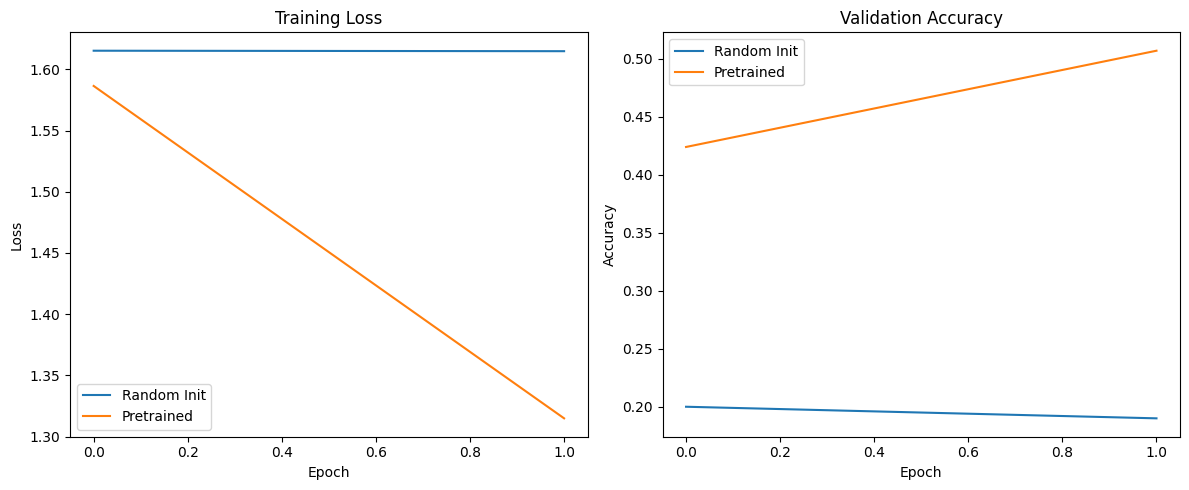

In [21]:
plot_training_curves(random_losses, random_accuracies, pretrained_losses, pretrained_accuracies)

# **Evaluation**

Important: Use test split for eval, not validation (& ofc no train)

In [22]:
def evaluate(model, dataloader, device):
    model.eval()
    true_labels = []
    predicted_labels = []
    all_logits = []
    
    with torch.no_grad():
        progress_bar = tqdm(dataloader, desc="Evaluation")
        
        for batch in progress_bar:
            # Move batch to device
            input_ids, attention_mask, token_type_ids, labels = [b.to(device) for b in batch]
            
            # Forward pass
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids
            )
            
            # Get predictions
            logits = outputs.logits
            _, preds = torch.max(logits, dim=1)
            
            # Collect labels and predictions
            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(preds.cpu().numpy())
            all_logits.append(logits.cpu().numpy())
    
    # Combine all logits
    all_logits = np.vstack(all_logits) if all_logits else np.array([])
    
    # Compute metrics
    from sklearn.metrics import (
        accuracy_score, 
        precision_score, 
        recall_score, 
        f1_score, 
        confusion_matrix,
        classification_report
    )
    
    accuracy = accuracy_score(true_labels, predicted_labels)
    
    # Only calculate these metrics if there are predictions for each class
    try:
        precision = precision_score(true_labels, predicted_labels, average='weighted')
        recall = recall_score(true_labels, predicted_labels, average='weighted')
        f1 = f1_score(true_labels, predicted_labels, average='weighted')
    except:
        print("Warning: Some classes may not have predictions. Using only accuracy.")
        precision = recall = f1 = None
    
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Class-wise report 
    class_report = classification_report(true_labels, predicted_labels, output_dict=True)
    
    # Create a list to map index to answer choice label (A-E)
    idx_to_label = {i: chr(65 + i) for i in range(5)}  # 0->A, 1->B, etc.
    
    # Calculate per-class accuracy
    class_accuracies = {}
    for i in range(5):
        class_indices = np.where(np.array(true_labels) == i)[0]
        if len(class_indices) > 0:
            class_correct = sum([predicted_labels[j] == i for j in class_indices])
            class_accuracies[idx_to_label[i]] = class_correct / len(class_indices)
        else:
            class_accuracies[idx_to_label[i]] = 0
    
    results = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
        'class_report': class_report,
        'per_class_accuracy': class_accuracies,
        'logits': all_logits
    }
    
    # Print summary
    print(f"Overall Accuracy: {accuracy:.4f}")
    print("Per-class accuracy:")
    for label, acc in class_accuracies.items():
        print(f"  Choice {label}: {acc:.4f}")
    
    return results

In [23]:
random_model_results = evaluate(random_model, test_dataloader, device)

Evaluation: 100%|██████████| 39/39 [00:07<00:00,  5.01it/s]

Overall Accuracy: 0.1892
Per-class accuracy:
  Choice A: 0.1548
  Choice B: 0.1882
  Choice C: 0.1867
  Choice D: 0.2112
  Choice E: 0.2043


In [24]:
pretrained_model_results = evaluate(pretrained_model, test_dataloader, device)

Evaluation: 100%|██████████| 39/39 [00:07<00:00,  5.01it/s]

Overall Accuracy: 0.5127
Per-class accuracy:
  Choice A: 0.5439
  Choice B: 0.5490
  Choice C: 0.4606
  Choice D: 0.5498
  Choice E: 0.4553


# **Interpretation**

# **Tools used**

### **Adjust this section before submitting**

1. **Programming Environment**
   - Python 3.12.8
   - Jupyter Notebook

2. **Machine Learning and Deep Learning**
   - PyTorch (neural network development)
   - Hugging Face Datasets (data management)
   - NLTK (natural language preprocessing)
   - FastText (pre-trained word embeddings, 300-dimensional vectors)

3. **Data Manipulation and Analysis**
   - NumPy (numerical computing)
   - Pandas (data structuring and manipulation)
   - Scikit-learn (potential additional machine learning utilities)

4. **Visualization and Tracking**
   - Matplotlib (basic plotting)
   - Seaborn (statistical data visualization)
   - Weights & Biases (experiment tracking and logging)
     * Tracked metrics: training loss, accuracy, learning rates
     * Logged hyperparameter configurations
     * Enabled comparative analysis across model runs

5. **Computational Infrastructure**
   - CUDA-enabled GPU acceleration
   - GPU-optimized PyTorch operations
   - Efficient parallel computing for model training

6. **Dataset and Benchmarking**
   - CommonsenseQA dataset (Hugging Face)
   - Standard benchmark for commonsense reasoning tasks

7. **Additional Libraries**
   - Gensim (word vector processing)
   - tqdm (progress bar visualization)
   - datetime (experiment timestamping)

8. **AI-Tools**
   - Claude 3.5 Sonnet: Utilized as a coding assistant for debugging, optimization and documentation.
   - GPT-4-turbo: Assisted in drafting and refining documentation, helping with structure and phrasing.
   - Copilot: Used for quick inserts, when recommendation was suitable for what I was planning to do.

9. **Sources**
   - Transformer architecture: https://medium.com/data-science/build-your-own-transformer-from-scratch-using-pytorch-84c850470dcb